<a href="https://colab.research.google.com/github/M0n1ka-05/team1-telecom-churn-data-analysis/blob/main/Monika_Shinde_Team_1_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

# ***Churn*** rate is the percentage of subscribers to a service that 
discontinue their subscription to that service in a given time period.

So, here we are having a dataset of French multinational telecommunications corporation. And our tsk is to explore and analyze dataset, discover the factor responsible for churn, and come up with recommendation to ensure retention. 



---

From just a genral idea , why people will leave any telecom services, there are few basic reasons: 
1. Network Issues
2. Price
3. Poor Customer services etc.

Lets not assume any more , and analyze our actual dataset, and find out what caused churn there:

# **Key Points after initial observation of dataset:**
  

1.   Column churn having value true are all customer who left , telecom service 
2.   Network conectivity of area might be reponsible for customer to change     there network provider.
3.   Account length might be the number of days , customer has used particular service.
4. Nunber and frequency of Customer care calls is more for customer who have cancelled subscription





In [2]:
#Import package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
working_directory = '/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/dat/'
df = pd.read_csv(working_directory + 'telecom_churn.csv')

# So lets, start with our basic observation of dataset:

In [5]:
df.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [53]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn', 'State_AreaCode'],
      dtype='object')

In [8]:
#No. of values with Churn == True
cutomer_who_left = len(df[df['Churn'] == True])

In [9]:
#No. of values with Churn == True(Existing Customer)
total_customer = len(df['Churn'])

In [10]:
#this is the approx churn percentage 
Percentage_of_cutomer_cancelled_subscription = (cutomer_who_left/total_customer)* 100

print(f'Approx % of consumer who have cancelled there subscrition are: {Percentage_of_cutomer_cancelled_subscription} ')

Approx % of consumer who have cancelled there subscrition are: 14.491449144914492 


In [64]:
#now to simply out work lets make seprate df on basis of Chhurn data

df_of_churn = df[df['Churn']==True]

In [18]:
df_existing_cust = df[df['Churn']==False]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


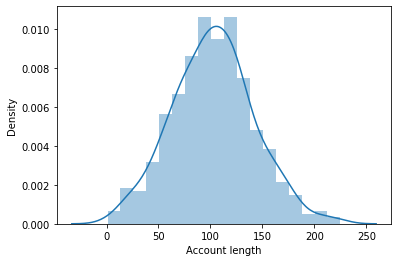

In [19]:
# account length  is somewht near  101 (approx)
sns.distplot(df_of_churn['Account length'],hist=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


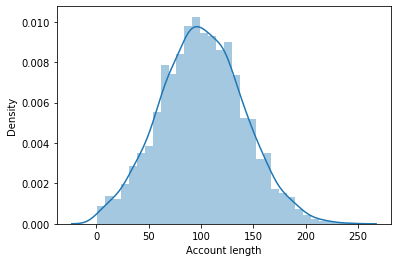

In [24]:
#existing customer
sns.distplot(df_existing_cust['Account length'],hist=True)

In [ ]:
# frequency of customer calls is more for chruned dataset

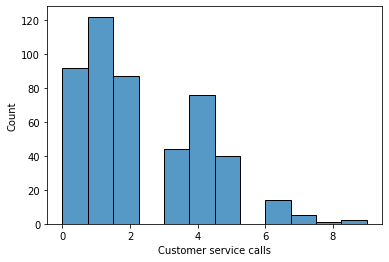

In [21]:
sns.histplot(df_of_churn['Customer service calls'])


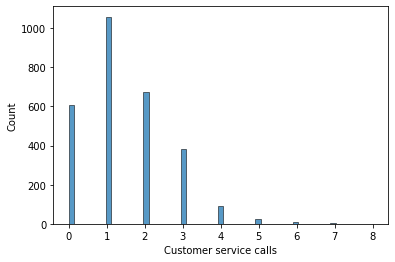

In [22]:
sns.histplot(df_existing_cust['Customer service calls'])

In [23]:
#statewise count 
df_of_churn.groupby('State')['State'].count().sort_values(ascending = True)

State
AK     3
IA     3
HI     3
AZ     4
LA     4
NE     5
VA     5
TN     5
DC     5
IL     5
NM     6
RI     6
ND     6
WI     7
MO     7
AL     8
GA     8
PA     8
KY     8
FL     8
SD     8
VT     8
OK     9
NH     9
WY     9
CA     9
CO     9
DE     9
ID     9
IN     9
WV    10
UT    10
OH    10
AR    11
OR    11
MA    11
NC    11
CT    12
KS    13
ME    13
NV    14
SC    14
WA    14
MT    14
MS    14
MN    15
NY    15
MI    16
MD    17
NJ    18
TX    18
Name: State, dtype: int64

In [26]:
df_existing_cust.groupby('State')['State'].count().sort_values(ascending = True)

State
CA    25
PA    37
IA    41
AR    44
SC    46
GA    46
NH    47
LA    47
TN    48
AK    49
DC    49
ME    49
NJ    50
HI    50
KY    51
MS    51
NV    52
WA    52
SD    52
OK    52
DE    52
IL    53
MD    53
MA    54
TX    54
MT    54
FL    55
MO    56
ND    56
NE    56
NM    56
CO    57
KS    57
NC    57
MI    57
RI    59
AZ    60
IN    62
UT    62
CT    62
ID    64
VT    65
OR    67
WY    68
OH    68
NY    68
MN    69
WI    71
VA    72
AL    72
WV    96
Name: State, dtype: int64

In [30]:
df['State_AreaCode'] = df[['State', 'Area code']].apply(lambda x:  x['State'] + str(x["Area code"]), axis = 1) 

In [32]:
df.head(1)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_AreaCode
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False,KS415


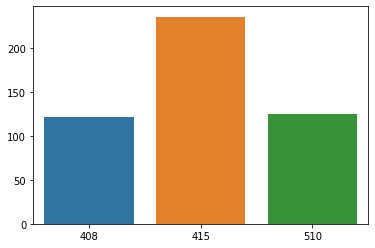

In [34]:
#area code analysis for churned dataset

arc,count= np.unique(df_of_churn['Area code'],return_counts=True)
sns.barplot(x=arc, y= count)

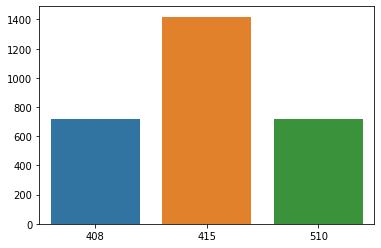

In [35]:
arc,count= np.unique(df_existing_cust['Area code'],return_counts=True)
sns.barplot(x=arc, y= count)

In [36]:
np.unique(df['Area code'])

array([408, 415, 510])

In [37]:
df.head(1)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_AreaCode
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False,KS415


In [46]:
#Chrun analysis considering column International plans
df[(df["International plan"]=='No')&(df["Churn"]==True)]


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_AreaCode
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True,IN415
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True,NY415
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True,CO408
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True,AZ408
48,ID,119,415,No,No,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5,True,ID415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280,AR,76,408,No,No,0,107.3,140,18.24,238.2,133,20.25,271.8,116,12.23,10.0,3,2.70,4,True,AR408
3287,KS,170,415,No,Yes,42,199.5,119,33.92,135.0,90,11.48,184.6,49,8.31,10.9,3,2.94,4,True,KS415
3301,CA,84,415,No,No,0,280.0,113,47.60,202.2,90,17.19,156.8,103,7.06,10.4,4,2.81,0,True,CA415
3322,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True,MD408


In [47]:
len(df[(df["International plan"]=='No')&(df["Churn"]==True)])

346

In [48]:
len(df[(df["International plan"]=='Yes')&(df["Churn"]==True)]) #had international plan , and left services.

137

In [49]:
df[(df["Voice mail plan"]=='No')&(df["Churn"]==True)]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_AreaCode
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True,IN415
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True,NY415
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True,CO408
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True,AZ408
48,ID,119,415,No,No,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5,True,ID415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,CA,84,415,No,No,0,280.0,113,47.60,202.2,90,17.19,156.8,103,7.06,10.4,4,2.81,0,True,CA415
3304,IL,71,510,Yes,No,0,186.1,114,31.64,198.6,140,16.88,206.5,80,9.29,13.8,5,3.73,4,True,IL510
3320,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True,GA510
3322,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True,MD408


In [50]:
#Voice Mail Plan
en(df[(df["Voice mail plan"]=='No')&(df["Churn"]==True)])

403

In [51]:
len(df[(df["Voice mail plan"]=='Yes')&(df["Churn"]==True)])

80

From above we can consider like ,people not using Voice mail plan likely to be leaving services

In [57]:
df['Effective_charge'] = df.apply(lambda x: (x['Total day charge']+x['Total eve charge']+x['Total night charge']+x['Total intl charge'])/(x['Total day minutes']+x['Total eve minutes']+x['Total night minutes']+x['Total intl minutes']),axis=1)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


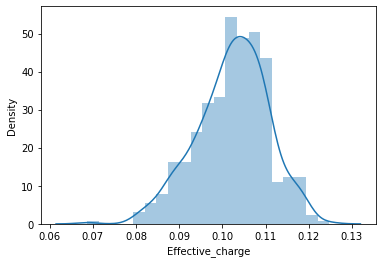

In [65]:
sns.distplot(df_of_churn['Effective_charge'],hist=True)

By seeing above graph, most common thing which comes in mind is , its first look.
It tells us that its Left skewed .


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


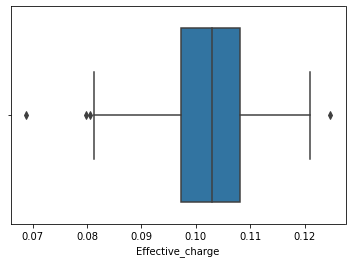

In [66]:
sns.boxplot(df_of_churn['Effective_charge'])